In [1]:
import polars as pl
import catboost as cb
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pl.read_csv('YDEX_10_CANDLES')

open,close,high,low,value,volume,begin,end
f64,f64,f64,f64,f64,i64,str,str
1546.7,1546.7,1546.7,1546.7,1546.7,1,"""2014-06-04T10:00:00.000000""","""2014-06-04T10:05:01.000000"""
1546.8,1546.8,1546.8,1546.8,618720.0,400,"""2014-06-04T10:10:00.000000""","""2014-06-04T10:13:05.000000"""
1546.8,1546.8,1546.8,1546.8,7.1153e6,4600,"""2014-06-04T10:40:00.000000""","""2014-06-04T10:48:06.000000"""
1546.8,1545.0,1546.8,1545.0,2.9380e6,1900,"""2014-06-04T11:40:00.000000""","""2014-06-04T11:44:06.000000"""
1546.8,1546.8,1546.8,1546.8,3093.6,2,"""2014-06-04T11:50:00.000000""","""2014-06-04T11:56:10.000000"""
…,…,…,…,…,…,…,…
3716.0,3718.0,3719.5,3713.0,4.01024e7,10789,"""2024-11-15T19:30:00.000000""","""2024-11-15T19:39:59.000000"""
3717.5,3713.5,3718.5,3710.5,3.1031e7,8351,"""2024-11-15T19:40:00.000000""","""2024-11-15T19:49:59.000000"""
3713.5,3707.5,3715.0,3707.5,1.5820605e7,4263,"""2024-11-15T19:50:00.000000""","""2024-11-15T19:59:59.000000"""


In [3]:
df = pl.read_csv('YDEX_10_CANDLES').select('open', 'close', 'high', 'low', 'value', 'volume', pl.col('begin').str.to_datetime()).unique().sort(by='begin')
df

open,close,high,low,value,volume,begin
f64,f64,f64,f64,f64,i64,datetime[μs]
1546.7,1546.7,1546.7,1546.7,1546.7,1,2014-06-04 10:00:00
1546.8,1546.8,1546.8,1546.8,618720.0,400,2014-06-04 10:10:00
1546.8,1546.8,1546.8,1546.8,7.1153e6,4600,2014-06-04 10:40:00
1546.8,1545.0,1546.8,1545.0,2.9380e6,1900,2014-06-04 11:40:00
1546.8,1546.8,1546.8,1546.8,3093.6,2,2014-06-04 11:50:00
…,…,…,…,…,…,…
3716.0,3718.0,3719.5,3713.0,4.01024e7,10789,2024-11-15 19:30:00
3717.5,3713.5,3718.5,3710.5,3.1031e7,8351,2024-11-15 19:40:00
3713.5,3707.5,3715.0,3707.5,1.5820605e7,4263,2024-11-15 19:50:00


заполняем пропуски: если строка с определенынм временем пропущена, и бумага не торговалась, \
выставляем $open = 0, close_i = close_{i+1}, low = 0, high = 0$
(правда потом мы подумали что их брать не стоит, и вырезали ночное время)

In [4]:
df_filled = df.upsample('begin', every='10m').filter(pl.col('begin').dt.hour().is_between(10, 23) & pl.col('begin').dt.weekday().is_between(1, 5)).with_columns(close=pl.col('close').fill_null(strategy='forward')).fill_null(strategy='zero').filter(pl.col('volume').rolling_max(window_size = 12) > 0)
df_filled

begin,open,close,high,low,value,volume
datetime[μs],f64,f64,f64,f64,f64,i64
2014-06-04 11:50:00,1546.8,1546.8,1546.8,1546.8,3093.6,2
2014-06-04 12:00:00,0.0,1546.8,0.0,0.0,0.0,0
2014-06-04 12:10:00,1546.8,1546.8,1546.8,1546.8,3093.6,2
2014-06-04 12:20:00,0.0,1546.8,0.0,0.0,0.0,0
2014-06-04 12:30:00,0.0,1546.8,0.0,0.0,0.0,0
…,…,…,…,…,…,…
2024-11-15 19:30:00,3716.0,3718.0,3719.5,3713.0,4.01024e7,10789
2024-11-15 19:40:00,3717.5,3713.5,3718.5,3710.5,3.1031e7,8351
2024-11-15 19:50:00,3713.5,3707.5,3715.0,3707.5,1.5820605e7,4263


In [5]:
df.group_by_dynamic('begin', every='1d').agg(pl.col('begin').dt.hour().min().alias('first'), pl.col('begin').dt.hour().max().alias('last')).filter(pl.col('last') == 23)

begin,first,last
datetime[μs],i8,i8
2020-06-22 00:00:00,9,23
2020-06-23 00:00:00,9,23
2020-06-25 00:00:00,9,23
2020-06-26 00:00:00,9,23
2020-06-29 00:00:00,9,23
…,…,…
2024-11-08 00:00:00,9,23
2024-11-11 00:00:00,9,23
2024-11-12 00:00:00,9,23


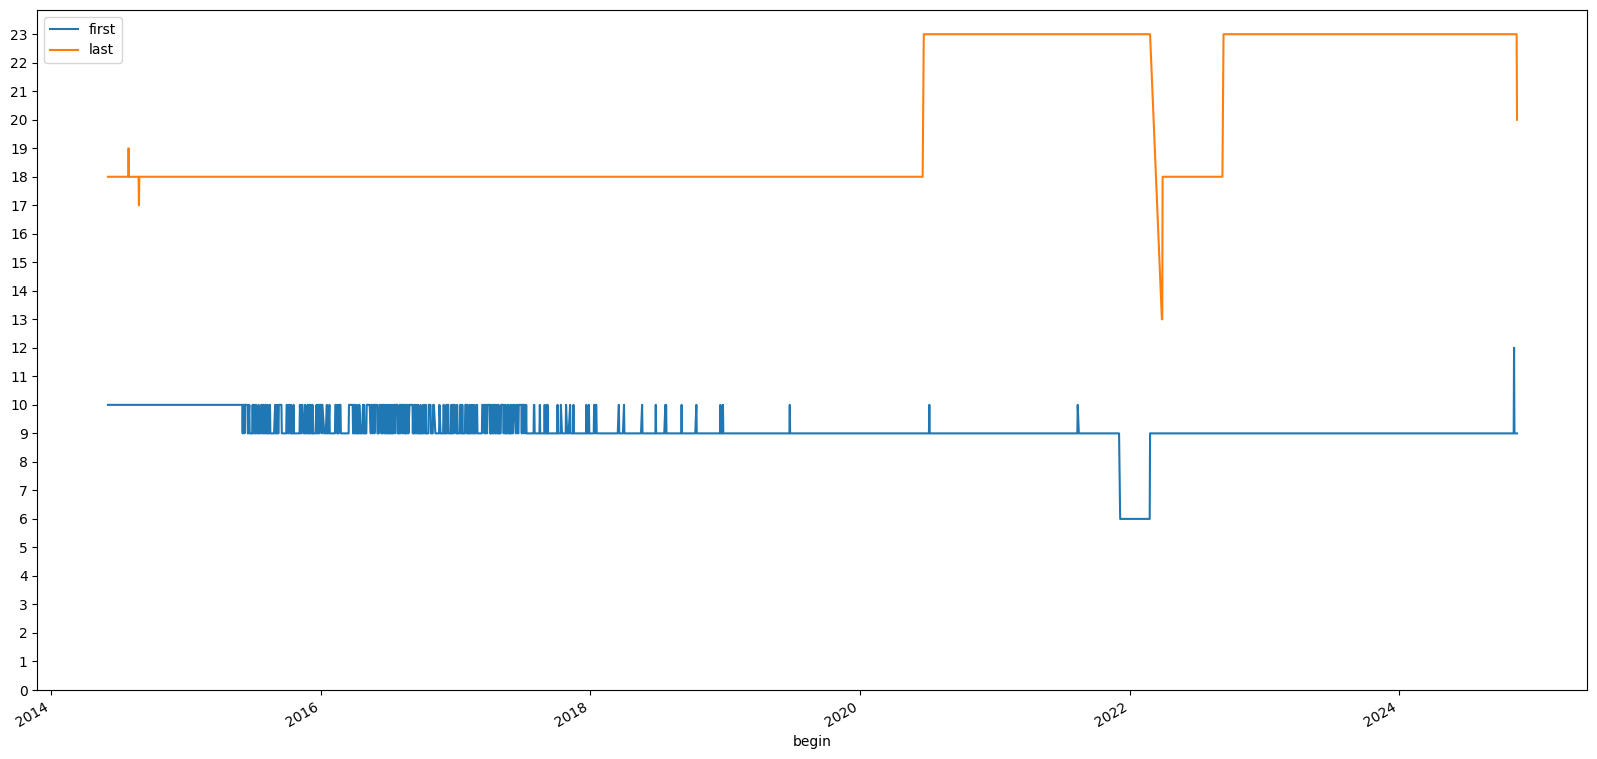

In [6]:
df.group_by_dynamic('begin', every='1d').agg(pl.col('begin').dt.hour().min().alias('first'), pl.col('begin').dt.hour().max().alias('last')).to_pandas().set_index('begin').plot(figsize=(20, 10))

plt.yticks(range(24))
plt.show()

array([[<Axes: title={'center': 'begin'}>]], dtype=object)

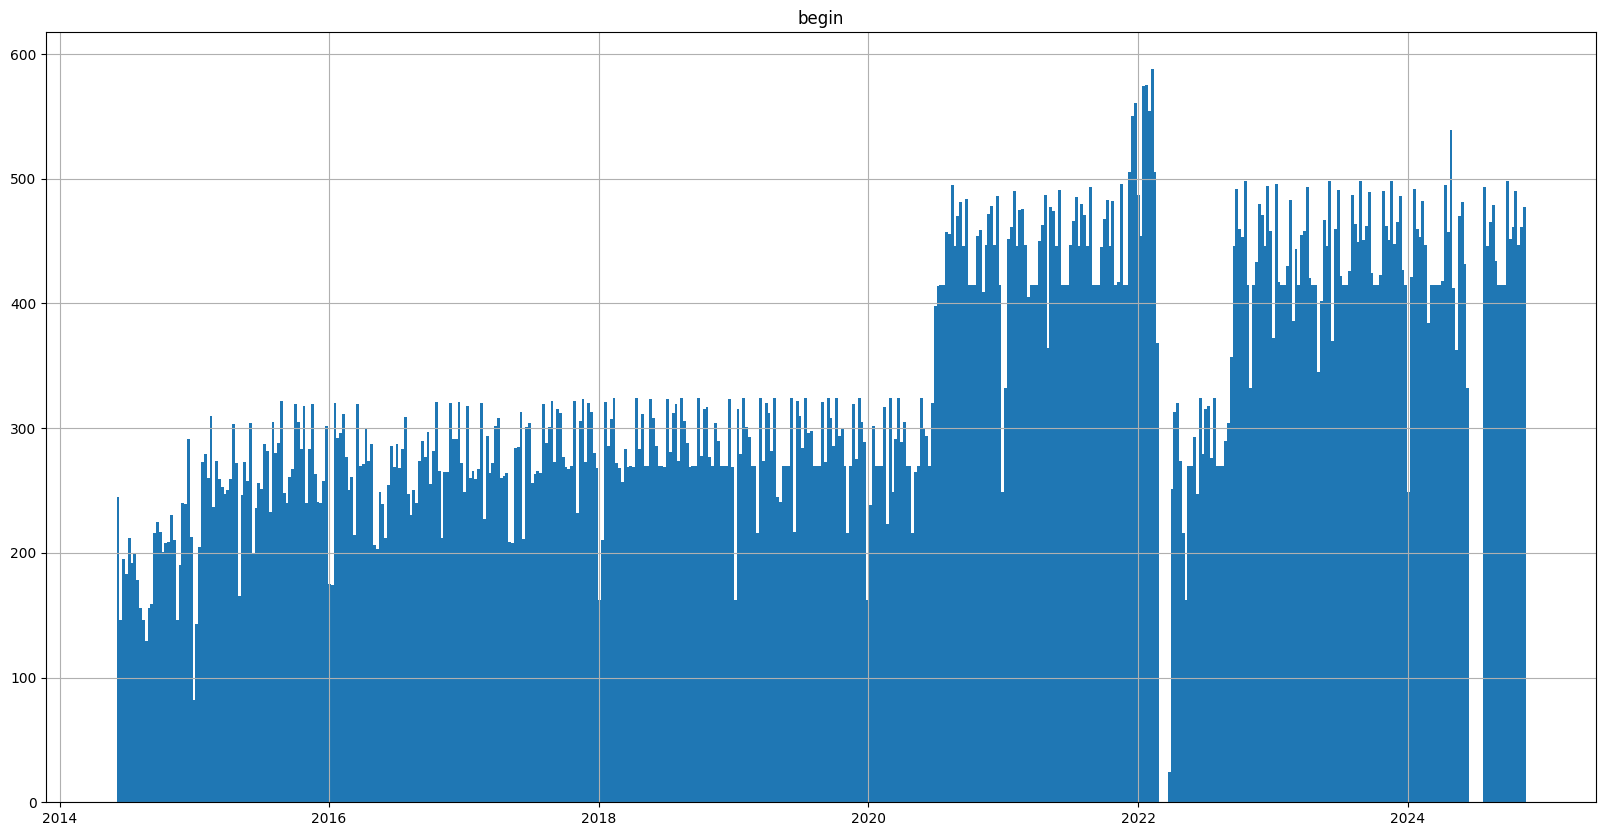

In [7]:
df.select('begin').to_pandas().hist(bins=500, figsize=(20, 10))

In [49]:
cur_df = df_filled.filter(pl.col('begin').dt.date() >= pl.date(2023, 1, 1))

In [50]:
num_lags = 12

In [51]:
features_df = cur_df.select((
            pl.col('close').shift(-1) / pl.col('close')).alias('target'), # таргет - отношение следующей цены и нынешней
            pl.col('open') / pl.col('close'),  # нормируем цену открытия,
            pl.col('high') / pl.col('close'),  # максимальную и
            pl.col('low') / pl.col('close'),   # минимальную к цене закрытия
            (pl.col('value') / pl.col('volume') / pl.col('close')).alias('mean'), # нормируем среднюю цену к цене закрытия
            pl.col('volume'), # число бумаг не меняем
            (pl.col('high') - pl.col('low')).alias('spread') / pl.col('close'), # разница high и low, отнормированная к close
            *(pl.col('close').shift(1).rolling_mean(i).alias(f'mean_{i}') / pl.col('close') for i in (3, 6, 9, 18)), # предыдущие running mean, отнормированные к close
            (pl.col('begin').dt.hour().cast(pl.Int16) * 60 + pl.col('begin').dt.minute()).alias('minute'), # номер минуты в дне для сезонности?
            pl.col('begin').dt.month().alias('month'), # месяц для сезонности?
            *((pl.col('close') / pl.col('close').shift(i)).alias(f'lag_{i}') for i in range(1, num_lags + 1) # лаги - отношение нынешней цены закрытия и цены закрытия i периодов назад
            )).drop_nulls()
features_df

target,open,high,low,mean,volume,spread,mean_3,mean_6,mean_9,mean_18,minute,month,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
f64,f64,f64,f64,f64,i64,f64,f64,f64,f64,f64,i16,i8,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1.00044,0.99923,1.00088,0.998789,0.999675,2867,0.002091,0.997102,0.998331,1.000135,1.000232,680,1,1.000771,1.001985,1.005979,1.00287,1.001875,0.9966,0.993331,0.995835,0.99967,0.99967,0.99967,0.99967
0.99978,0.99956,1.0,0.99868,0.999449,1668,0.00132,0.998643,0.997323,0.999658,0.999774,690,1,1.00044,1.001212,1.002426,1.006422,1.003311,1.002316,0.997038,0.993768,0.996274,1.00011,1.00011,1.00011
1.00077,1.00055,1.00099,0.99967,1.000181,1245,0.00132,0.99967,0.997928,0.999462,1.0,700,1,0.99978,1.00022,1.000991,1.002206,1.0062,1.003091,1.002095,0.996819,0.99355,0.996054,0.99989,0.99989
0.99989,0.99923,1.0,0.99912,0.999511,1810,0.00088,0.99923,0.997673,0.997972,0.999224,710,1,1.00077,1.00055,1.000991,1.001762,1.002978,1.006975,1.003863,1.002867,0.997587,0.994315,0.996822,1.00066
1.0011,1.00011,1.00022,0.998131,0.999475,2626,0.002089,0.99967,0.998937,0.997813,0.999371,720,1,0.99989,1.00066,1.00044,1.00088,1.001652,1.002867,1.006864,1.003753,1.002757,0.997477,0.994206,0.996712
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1.000673,1.00148,1.00148,0.999462,1.00047,8922,0.002019,0.996995,0.995514,0.994243,0.99292,1160,11,0.998656,1.003511,1.006911,1.006911,1.005004,1.006093,1.00855,1.00814,1.008414,1.007593,1.00773,1.00732
0.99879,0.999462,1.000403,0.998655,0.999723,10789,0.001748,0.99861,0.995854,0.994501,0.992678,1170,11,1.000673,0.999328,1.004186,1.007588,1.007588,1.00568,1.00677,1.009229,1.008818,1.009092,1.008271,1.008408
0.998384,1.001077,1.001346,0.999192,1.000629,8351,0.002154,1.001212,0.998003,0.996679,0.99439,1180,11,0.99879,0.999462,0.998119,1.002971,1.006369,1.006369,1.004463,1.005551,1.008008,1.007597,1.007871,1.007051


In [52]:
(features_df.select('target').to_numpy() == 1).mean()

0.06661730092825219

ура время фитпредикт

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_df.select(pl.exclude('target')).to_numpy(), features_df.select('target').to_numpy(), test_size=0.2, shuffle=False)

y_train, y_test = y_train.flatten(), y_test.flatten()

In [22]:
(y_test >= 1).mean() # accuracy константы

0.5352373396800212

In [61]:
from catboost import CatBoostRegressor, Pool

model = CatBoostRegressor(depth=5, iterations=500, use_best_model=True, loss_function='RMSE', eval_metric='MAE')

model.fit(X_train, y_train, eval_set=Pool(X_test, y_test))

Learning rate set to 0.132739
0:	learn: 0.0013804	test: 0.0014960	best: 0.0014960 (0)	total: 9.05ms	remaining: 4.51s
1:	learn: 0.0013782	test: 0.0014953	best: 0.0014953 (1)	total: 14.1ms	remaining: 3.51s
2:	learn: 0.0013763	test: 0.0014946	best: 0.0014946 (2)	total: 18.4ms	remaining: 3.05s
3:	learn: 0.0013748	test: 0.0014941	best: 0.0014941 (3)	total: 22.9ms	remaining: 2.84s
4:	learn: 0.0013736	test: 0.0014938	best: 0.0014938 (4)	total: 27.1ms	remaining: 2.68s
5:	learn: 0.0013725	test: 0.0014933	best: 0.0014933 (5)	total: 31.3ms	remaining: 2.58s
6:	learn: 0.0013714	test: 0.0014928	best: 0.0014928 (6)	total: 35.7ms	remaining: 2.51s
7:	learn: 0.0013705	test: 0.0014922	best: 0.0014922 (7)	total: 40.1ms	remaining: 2.47s
8:	learn: 0.0013699	test: 0.0014922	best: 0.0014922 (7)	total: 44.2ms	remaining: 2.41s
9:	learn: 0.0013692	test: 0.0014917	best: 0.0014917 (9)	total: 48.6ms	remaining: 2.38s
10:	learn: 0.0013686	test: 0.0014915	best: 0.0014915 (10)	total: 53.8ms	remaining: 2.39s
11:	learn: 

In [62]:
pred = model.predict(X_test)

In [67]:
(np.sign(pred - 1) == np.sign(y_test - 1)).mean() # accuracy, считая 1

0.4938516461721539

In [64]:
(pred == 1).mean() # хм мы не предсказываем единички (когда цена не меняется)

0.0

In [68]:
(np.signbit(pred - 1) == np.signbit(y_test - 1)).mean() # accuracy, не считая 1

0.5427740314689938

In [66]:
(pred > 1).mean()

0.5743752479174931

In [65]:
pred.mean()

1.0000343410357702

In [67]:
pred.std()

0.0001565187413508249

In [ ]:
(y_test == 1).mean() # в тесте может быть меньше стабильных цен, потому что тест это современность - более активно торгуют

0.070271407532085

In [ ]:
(np.abs(pred - y_test) / np.abs(y_test)).mean() # MAPE

0.0014962246015404153

In [ ]:
from catboost import CatBoostClassifier, Pool

model = CatBoostClassifier(depth=5, iterations=500, use_best_model=True, loss_function='CrossEntropy', eval_metric='Accuracy', l2_leaf_reg=1000)

model.fit(X_train, np.signbit(y_train - 1), eval_set=Pool(X_test, np.signbit(y_test - 1))) # sign-bit: есть ли минус перед числом.

0:	learn: 0.5513719	test: 0.5390718	best: 0.5390718 (0)	total: 9.04ms	remaining: 4.51s
1:	learn: 0.5535868	test: 0.5435674	best: 0.5435674 (1)	total: 17.2ms	remaining: 4.28s
2:	learn: 0.5534215	test: 0.5440963	best: 0.5440963 (2)	total: 25.6ms	remaining: 4.25s
3:	learn: 0.5563636	test: 0.5450218	best: 0.5450218 (3)	total: 33.8ms	remaining: 4.19s
4:	learn: 0.5581818	test: 0.5460796	best: 0.5460796 (4)	total: 42.2ms	remaining: 4.18s
5:	learn: 0.5570909	test: 0.5463440	best: 0.5463440 (5)	total: 50.7ms	remaining: 4.17s
6:	learn: 0.5556033	test: 0.5431707	best: 0.5463440 (5)	total: 58.9ms	remaining: 4.15s
7:	learn: 0.5572562	test: 0.5446251	best: 0.5463440 (5)	total: 67ms	remaining: 4.12s
8:	learn: 0.5564628	test: 0.5460796	best: 0.5463440 (5)	total: 77.7ms	remaining: 4.24s
9:	learn: 0.5568264	test: 0.5450218	best: 0.5463440 (5)	total: 87ms	remaining: 4.26s
10:	learn: 0.5564959	test: 0.5422451	best: 0.5463440 (5)	total: 95ms	remaining: 4.22s
11:	learn: 0.5580826	test: 0.5435674	best: 0.546

In [74]:
pred = model.predict(X_test)

In [ ]:
(np.signbit(-y_test + 1) == pred).mean()

0.5565251884172947

In [26]:
(y_test >= 1).mean()

0.5352373396800212

In [45]:
pred.mean()

0.35739785799286

In [46]:
pred.std()

0.4792333764409314

In [47]:
model.feature_importances_

array([ 2.33286776,  2.99687983,  9.11103502,  5.67382393,  2.65492516,
       20.48310078,  2.95312058,  1.77756091,  2.0437945 ,  0.96234932,
       25.98056176,  1.76892264,  2.42553641,  6.8245458 ,  2.7544233 ,
        1.00477632,  0.90670803,  1.32888799,  0.99518625,  0.84476454,
        1.30653594,  1.03447021,  0.86043526,  0.97478777])

In [ ]:
model.feature_names_ # высокие вклады у признаков spread и minute

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23']